<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/try/opencv0301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import cv2

# 讀取圖像
img = cv2.imread('plates.webp')

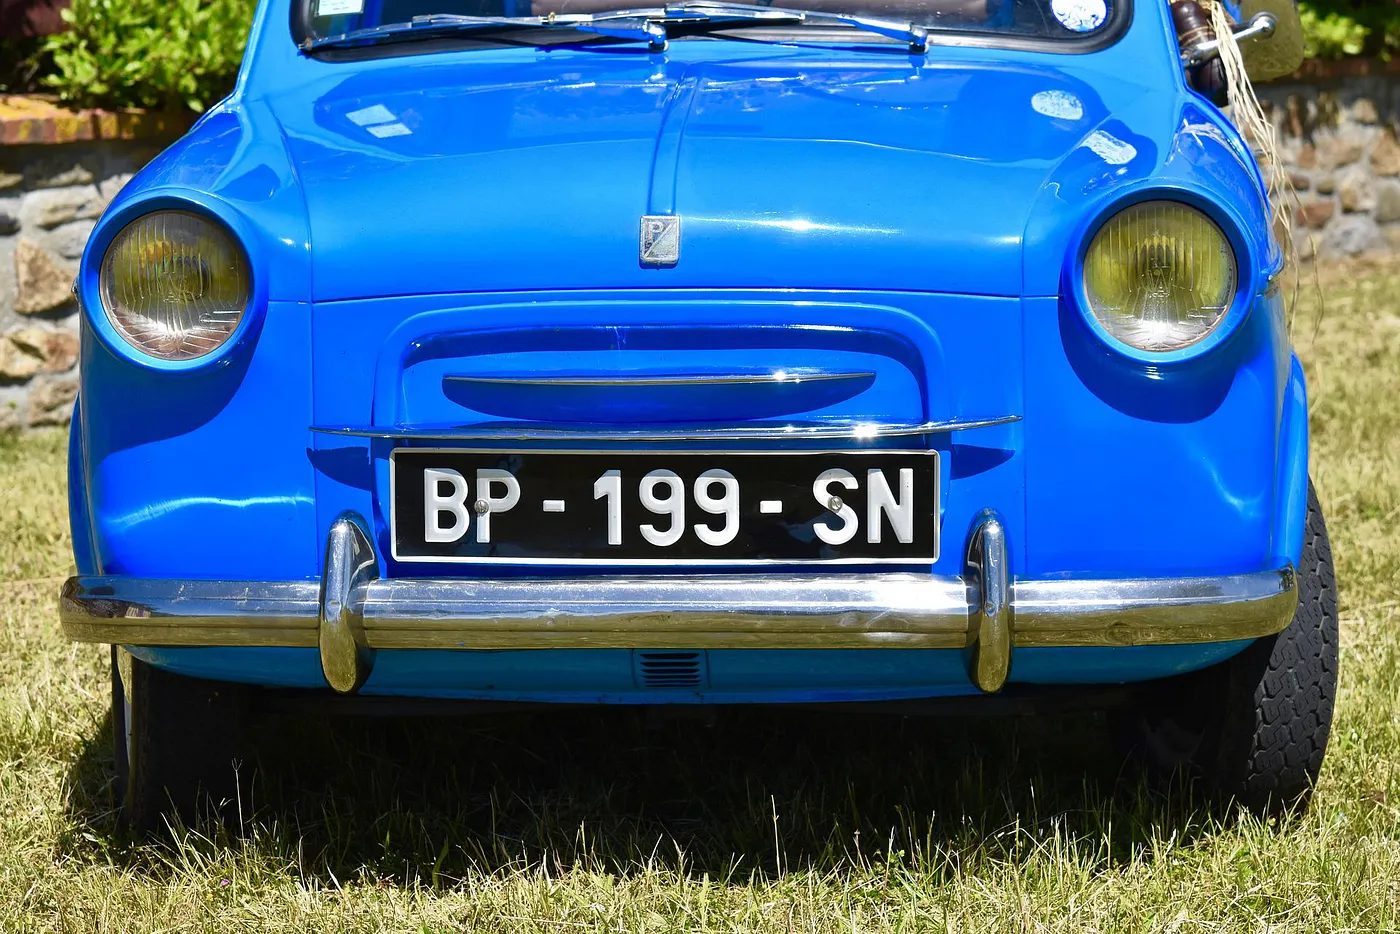

In [99]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [100]:
#轉換成灰度圖像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

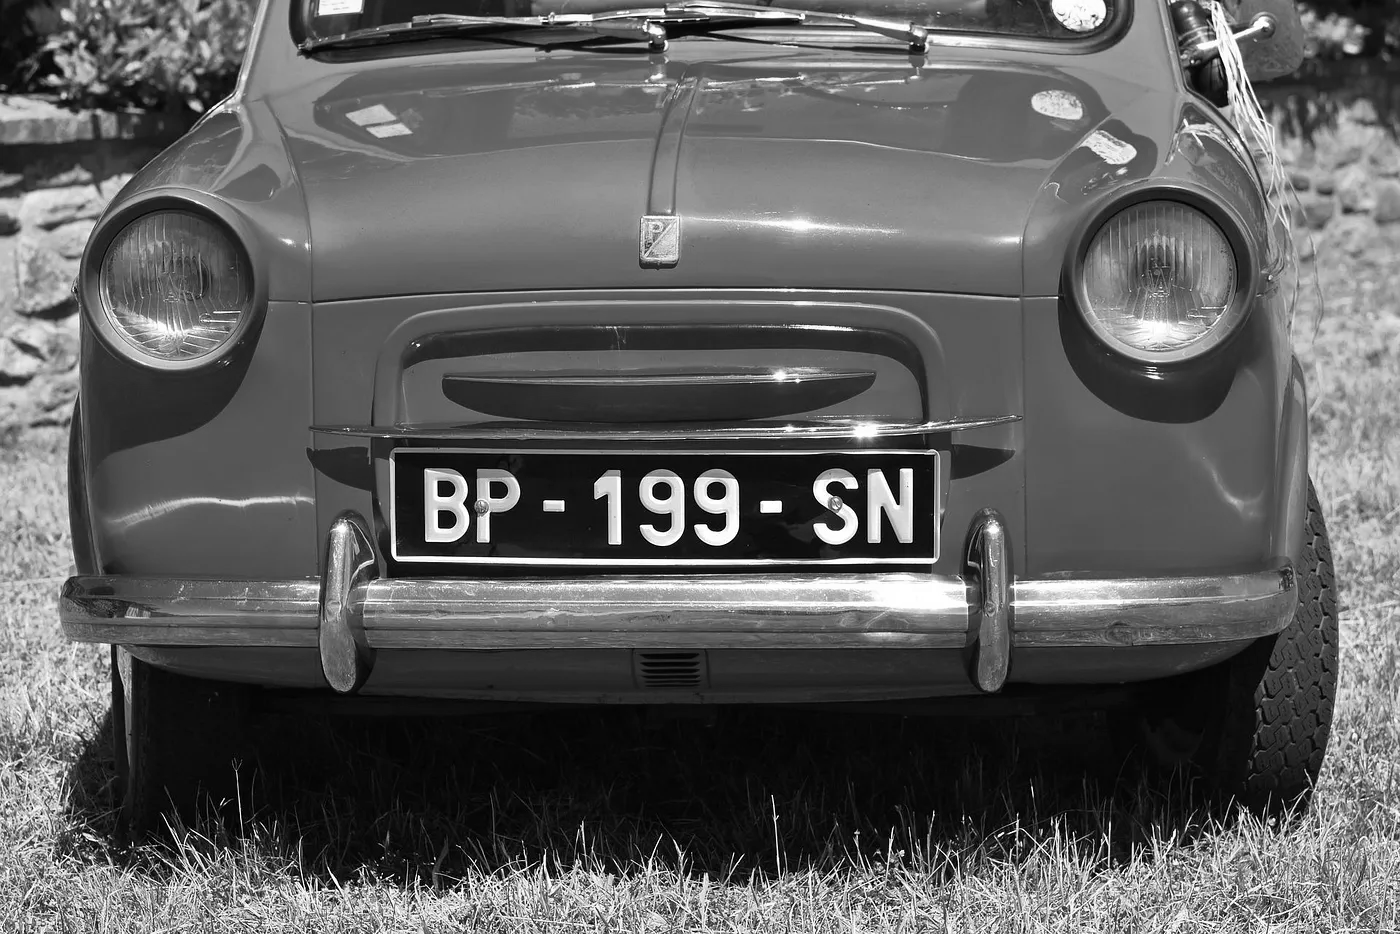

In [144]:
cv2_imshow(gray)

In [101]:
#模糊處理
img_blur = cv2.GaussianBlur(gray, (19,19), 0)

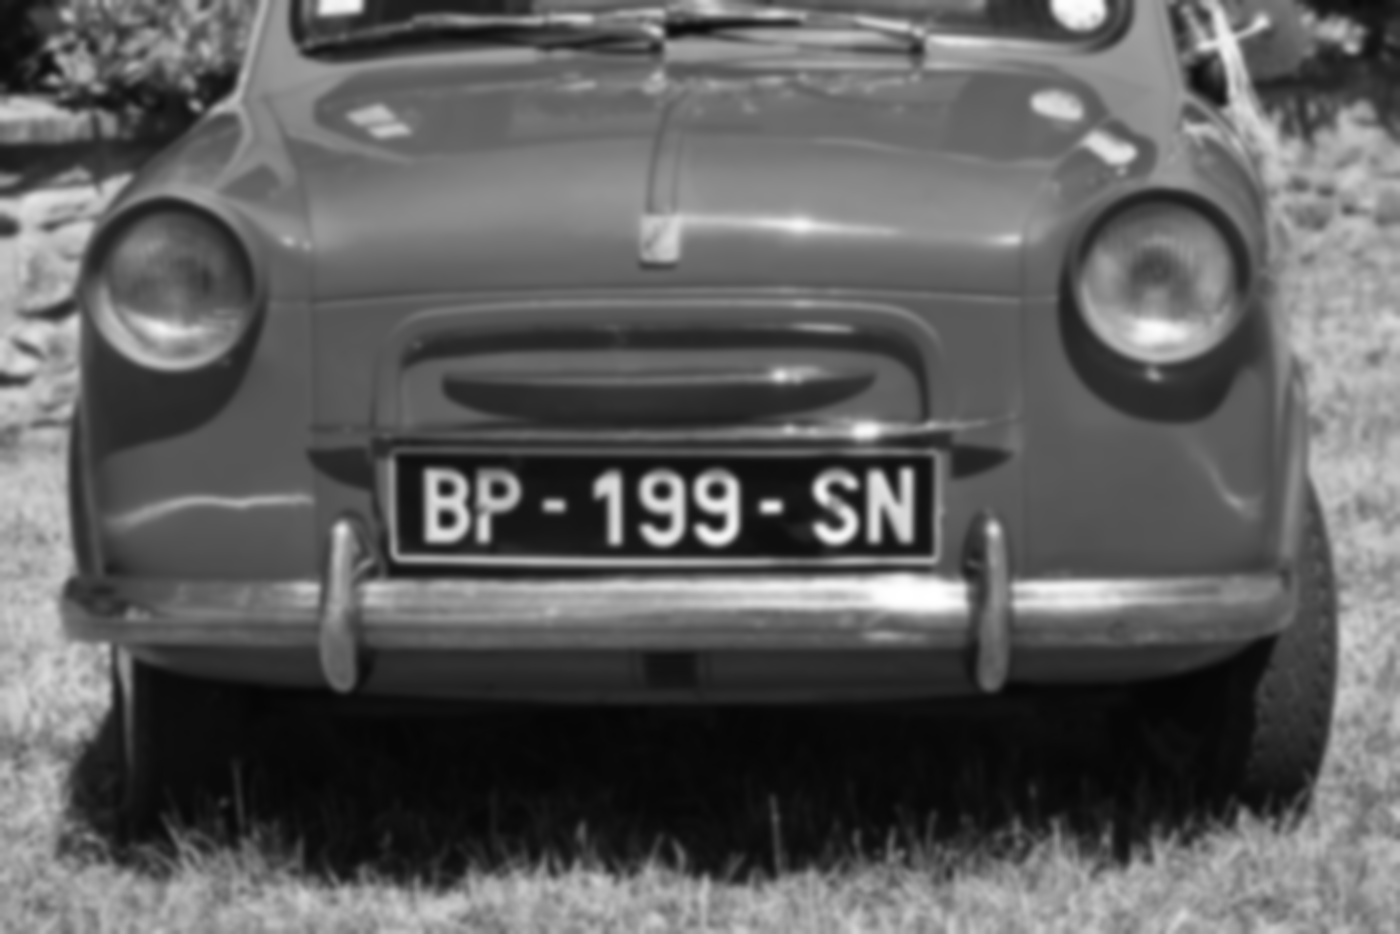

In [102]:
cv2_imshow(img_blur)

In [108]:
#邊緣檢測
img_canny = cv2.Canny(img, 30, 150)

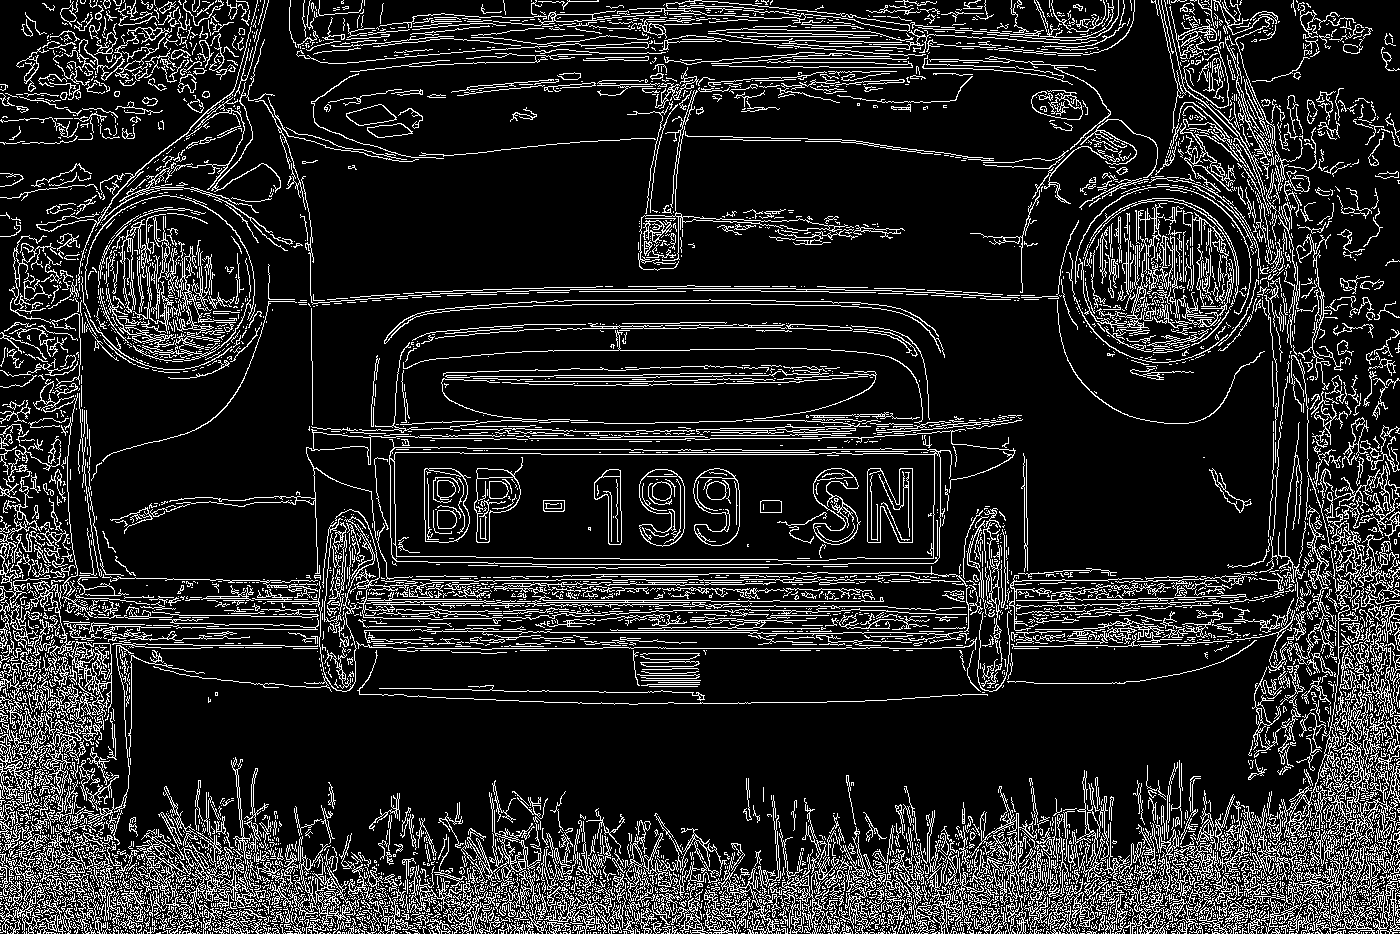

In [109]:
cv2_imshow(img_canny)

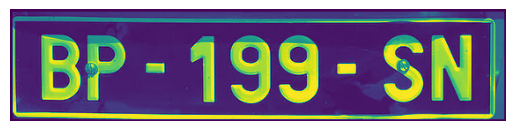

In [161]:
#提取車牌輪廓

contours, hierarchy = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
for item in contours:
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    width = rect[2]
    height = rect[3]
    if width / height > 4:
        cv2.rectangle(img, (x, y), (x+width, y+height), (0, 0, 255), 3)
        crop_img = gray[y:y+height, x:x+width]
        if not crop_img is None:
            # Convert to RGB
            #crop_img_rgb = cv2.cvtColor(crop_img, cv2.COLOR_GRAY2RGB)

            # Display cropped image
            plt.imshow(crop_img)
            plt.axis('off')
            plt.show()